In [31]:
import numpy as np
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
import scipy.interpolate as interp
import scipy.stats as st
import scipy.signal as sig
from scipy.optimize import curve_fit
import pickle
import os


import astropy as ap
from astropy.io import fits
from astropy import table as t
from astropy.table import Table
from astropy import wcs
from astropy.cosmology import WMAP7


import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors

rcParams["font.family"] = "DejaVu Sans"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 1

In [32]:
os.chdir("/Users/nitya/Work/Paper2/data")

In [33]:
drpall = t.Table.read('drpall-v2_5_3.fits')
drpall.add_index('plateifu')
index1 = np.where(drpall['srvymode']=='MaNGA dither')[0]
drpall1 = drpall[index1]
index2 = np.where(drpall1['z']>0)[0]
drpall = drpall1[index2]

In [38]:
afile = open(r'all_spaxels.pkl','rb')
a = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'3arcsec.pkl','rb')
d3a = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'5arcsec.pkl','rb')
d5a = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'7arcsec.pkl','rb')
d7a = pickle.load(afile, encoding = 'latin1')
afile.close()

afile = open(r'all_spaxels_b.pkl','rb')
b = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'3arcsec_b.pkl','rb')
d3b = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'5arcsec_b.pkl','rb')
d5b = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'7arcsec_b.pkl','rb')
d7b = pickle.load(afile, encoding = 'latin1')
afile.close()


afile = open(r'all_spaxels_c.pkl','rb')
c = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'3arcsec_c.pkl','rb')
d3c = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'5arcsec_c.pkl','rb')
d5c = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'7arcsec_c.pkl','rb')
d7c = pickle.load(afile, encoding = 'latin1')
afile.close()



In [39]:
d = np.hstack((a,b,c))
d3 = np.hstack((d3a,d3b,d3c))
d5 = np.hstack((d5a,d5b,d5c))
d7 = np.hstack((d7a,d7b,d7c))
#print(len(c))
#c['plate_ifu']

In [43]:
d['plate_ifu'].dtype

dtype('<U25')

In [44]:
data = np.array(list(zip(d['plate_ifu'],d['z'],d['hdelta'],d3['hdelta'],d5['hdelta'],d7['hdelta'],
                    d['dn4000'],d3['dn4000'], d5['dn4000'],d7['dn4000'])))

In [46]:
data = np.array(list(zip(d['plate_ifu'],d['z'],d['hdelta'],d3['hdelta'],d5['hdelta'],d7['hdelta'],
                    d['dn4000'],d3['dn4000'], d5['dn4000'],d7['dn4000'])),
                       dtype = [('plate_ifu', 'U25'),('z', 'f8'), ('hdelta_all', 'f8'), 
                                ('hdelta_3', 'f8'), ('hdelta_5', 'f8'),('hdelta_7', 'f8'),
                                ('dn4000_all','f8'),('dn4000_3', 'f8'), ('dn4000_5','f8'),
                                ('dn4000_7','f8')])

In [48]:
afile = open(r'manga_4000_hdelta_dn4000.pkl', 'wb')
pickle.dump(data,afile)

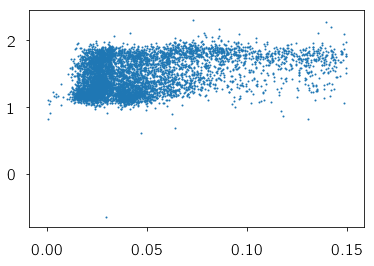

In [47]:
plt.scatter(data['z'], data['dn4000_all'], s = 1.0)
plt.show()

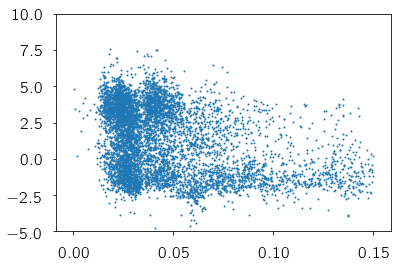

In [19]:
plt.scatter(data['z'], data['hdelta_all'], s = 1.0)
plt.ylim(-5,10)
#plt.scatter(data['z'], data['dn4000_5'], s = 1.0)
#plt.scatter(data['z'], data['dn4000_7'], s = 1.0)
plt.show()

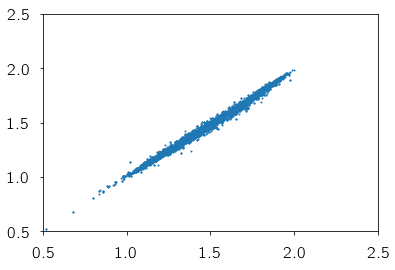

In [30]:
plt.scatter(data['dn4000_5'], data['dn4000_7'], s= 1.0)
plt.xlim(0.5,2.5)
plt.ylim(0.5,2.5)
plt.show()

In [16]:
alldata = np.array(list(zip(plate_ifu[m:n],z[m:n],np.array(sample)[:,0], np.array(sample)[:,1])),
                        dtype = [('plate_ifu', 'U25'),('z', 'f8'), ('hdelta', 'f8'), ('dn4000', 'f8')])
afile = open(r'5arcsec.pkl', 'wb')
pickle.dump(sample_ifu,afile)

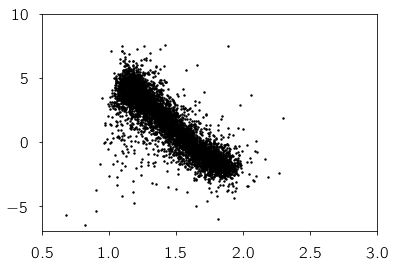

In [25]:
plt.scatter(data['dn4000_all'],data['hdelta_all'], s = 2.0, c = 'k')
#plt.scatter(b['dn4000'],b['hdelta'], s = 2.0, c = 'k')
plt.ylim(-7,10)
plt.xlim(0.5,3.0)
plt.show()

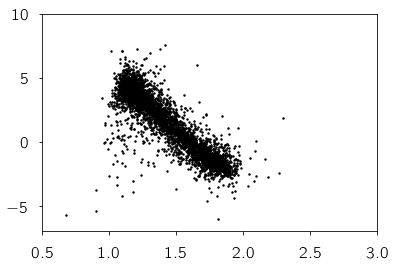

In [33]:
plt.scatter(c['dn4000'],c['hdelta'], s = 2.0, c = 'k')
plt.ylim(-7,10)
plt.xlim(0.5,3.0)
plt.show()

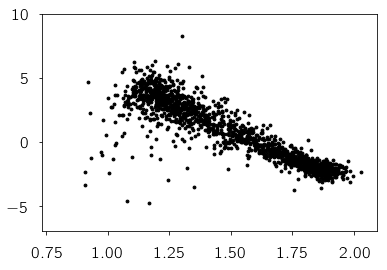

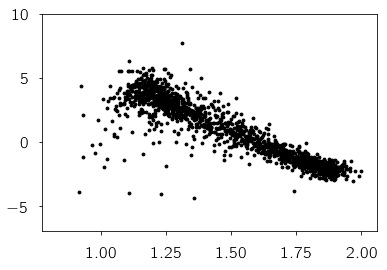

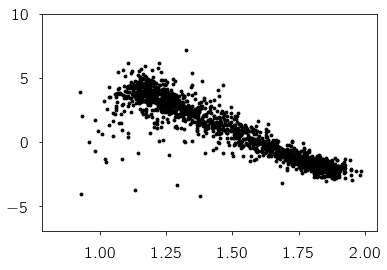

In [7]:
plt.scatter(d3['dn4000'],d3['hdelta'], s = 8.0, c = 'k')
plt.ylim(-7.0,10.0)
plt.show()
plt.scatter(d5['dn4000'],d5['hdelta'], s = 8.0, c = 'k')
plt.ylim(-7.0,10.0)
plt.show()
plt.scatter(d7['dn4000'],d7['hdelta'], s = 8.0, c = 'k')
plt.ylim(-7.0,10.0)
plt.show()

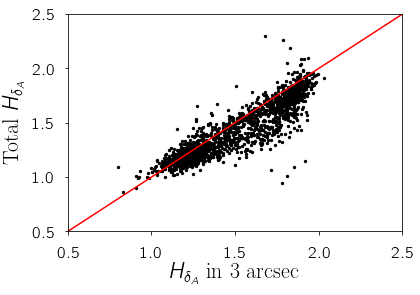

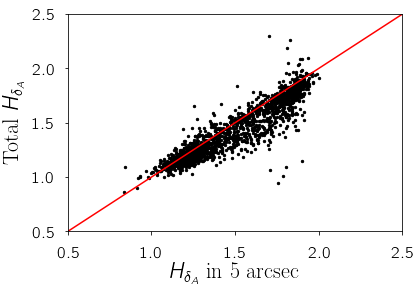

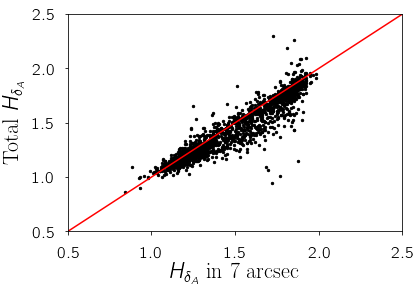

In [11]:
plt.scatter(d3['dn4000'], a['dn4000'], s =5.5, color = 'k')
plt.plot([0.5,1.0,2.0,3.3],[0.5,1.0,2.0,3.3], color = 'r')
plt.xlim(0.5,2.5)
plt.ylim(0.5,2.5)
plt.xlabel(r"$H_{\delta_{A}}$ in 3 arcsec", fontsize = 22)
plt.ylabel(r"Total $H_{\delta_{A}}$", fontsize = 22)
plt.show()

plt.scatter(d5['dn4000'], a['dn4000'], s =5.5, color = 'k')
plt.plot([0.5,1.0,2.0,3.3],[0.5,1.0,2.0,3.3], color = 'r')
plt.xlim(0.5,2.5)
plt.ylim(0.5,2.5)
plt.xlabel(r"$H_{\delta_{A}}$ in 5 arcsec", fontsize = 22)
plt.ylabel(r"Total $H_{\delta_{A}}$", fontsize = 22)
plt.show()

plt.scatter(d7['dn4000'], a['dn4000'], s =5.5, color = 'k')
plt.plot([0.5,1.0,2.0,3.3],[0.5,1.0,2.0,3.3], color = 'r')
plt.xlim(0.5,2.5)
plt.ylim(0.5,2.5)
plt.xlabel(r"$H_{\delta_{A}}$ in 7 arcsec", fontsize = 22)
plt.ylabel(r"Total $H_{\delta_{A}}$", fontsize = 22)
plt.show()

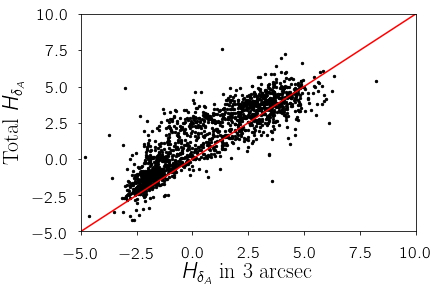

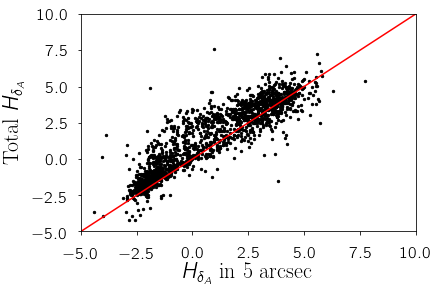

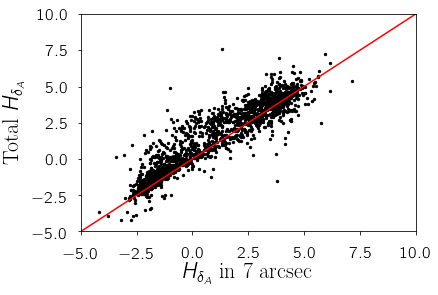

In [13]:
plt.scatter(d3['hdelta'], a['hdelta'], s =5.5, color = 'k')
plt.plot([-7.0,1.0,2.0,12.0],[-7.0,1.0,2.0,12.0], color = 'r')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel(r"$H_{\delta_{A}}$ in 3 arcsec", fontsize = 22)
plt.ylabel(r"Total $H_{\delta_{A}}$", fontsize = 22)
plt.show()

plt.scatter(d5['hdelta'], a['hdelta'], s =5.5, color = 'k')
plt.plot([-7.0,1.0,2.0,12.0],[-7.0,1.0,2.0,12.0], color = 'r')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel(r"$H_{\delta_{A}}$ in 5 arcsec", fontsize = 22)
plt.ylabel(r"Total $H_{\delta_{A}}$", fontsize = 22)
plt.show()

plt.scatter(d7['hdelta'], a['hdelta'], s =5.5, color = 'k')
plt.plot([-7.0,1.0,2.0,12.0],[-7.0,1.0,2.0,12.0], color = 'r')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel(r"$H_{\delta_{A}}$ in 7 arcsec", fontsize = 22)
plt.ylabel(r"Total $H_{\delta_{A}}$", fontsize = 22)
plt.show()